# Midterm Q2
Analysis 1 using ArticleRead
- Generate an API Key for article read.
- Dowloaded json files with "Red Sox" content
- Extracted the scores of Red Sox and the opponent teams details
- Analyzed how many matches Red Sox has won from all the total matches they have played and their trend through history

In [2]:
#getting data from Article Read
from nytimesarticle import articleAPI
import requests
import json
import time
from pprint import pprint
for i in range(50, 100):
    j=str(i)
    r = requests.get("http://api.nytimes.com/svc/search/v2/articlesearch.json?page="+j+"&q=red sox&api-key=de6fe7dfdb734556822c42df4e087ee5")  
    data = r.json()
    time.sleep(6)
    #print(len(data))
    #pprint(data)
    with open("Midterm/ArticleSearch/red"+j+".json", 'w') as outfile:
        json.dump(data, outfile)

In [2]:
import glob
import shutil
import os
import json
from pprint import pprint
files = []
json_files = glob.glob('Midterm/ArticleSearch/test/*.json') #absolute path to read the jason files
for file in json_files:
    with open(file) as data_file:
        data = json.load(data_file)
        files.append(data)
        #content=data['headline']['content_kicker']
        #print(content)
        
#pprint(data)

In [3]:
len(json_files)

31

In [52]:
import csv
with open("Red Sox.csv","w",encoding='utf-8') as myfile:
    writer = csv.writer(myfile, delimiter=",",) #, quotechar="|", quoting=csv.QUOTE_MINIMAL, lineterminator='\n'
    writer.writerow(["Team1","Team1","Score1","Team2","Score2"])

    RedSox_Scores = []
    total_goals_scored = []
    opponent_score = []
    for file in json_files:
        with open(file) as data_file:
            data = json.load(data_file)
            x = len(data)
            try:
                for i in range (0,x):
                    content=data['response']['docs'][i]['headline']['content_kicker']
                    content=content.split(",")
                    content.sort(key=lambda x: x.split('Red '))
                    content = [x.strip(' ') for x in content]
                    content = [x.split(' ') for x in content]
                    RedSox_Scores.append(int(content[0][2]))
                    opponent_score.append(int(content[1][1]))
                    total_goals_scored = [x + y for x, y in zip(RedSox_Scores, opponent_score)]
                    pprint(content)
                    #content.split()
                    #[i for c in content for i in rep.get(c, [c])]
                    #for n,i in enumerate(content):
                        #if "Red Sox" in i:
                            #content[n]=content.split(" ")  
                            #content[n]= "RedSox"
                    
        #try: 
                    #for i in range(0,len(content)):
                    writer.writerow([content[0][0],content[0][1],content[0][2],content[1][0],content[1][1]])
            except KeyError:
                pass
                

[['Red', 'Sox', '2'], ['Mets', '3']]
[['Red', 'Sox', '7'], ['Yankees', '8']]
[['Red', 'Sox', '4'], ['Yankees', '2']]
[['Red', 'Sox', '4'], ['Rays', '5']]
[['Red', 'Sox', '9'], ['Giants', '5']]
[['Red', 'Sox', '5'], ['Yankees', '9']]
[['Red', 'Sox', '4'], ['Mets', '2']]
[['Red', 'Sox', '10'], ['Yankees', '4']]
[['Red', 'Sox', '6'], ['Yankees', '8']]
[['Red', 'Sox', '2'], ['Yankees', '4']]
[['Red', 'Sox', '8'], ['Yankees', '4']]
[['Red', 'Sox', '4'], ['Rays', '13']]
[['Red', 'Sox', '2'], ['Yankees', '6']]
[['Red', 'Sox', '6'], ['Yankees', '8']]
[['Red', 'Sox', '7'], ['Yankees', '4']]
[['Red', 'Sox', '4'], ['Yankees', '3']]
[['Red', 'Sox', '1'], ['Yankees', '4']]
[['Red', 'Sox', '2'], ['Yankees', '1']]
[['Red', 'Sox', '5'], ['Yankees', '1']]
[['Red', 'Sox', '4'], ['Angels', '5']]
[['Red', 'Sox', '7'], ['Angels', '5']]
[['Red', 'Sox', '0'], ['Yankees', '1']]
[['Red', 'Sox', '6'], ['Yankees', '5']]
[['Red', 'Sox', '4'], ['Yankees', '3']]
[['Red', 'Sox', '3'], ['Yankees', '4']]


In [54]:
#RedSox.sort(key=lambda x: x[0])
#opponent_score.sort(key=lambda x: x[0])
#type (RedSox)
#RedSox.sort()
#opponent_score.sort()
#print(RedSox)
RedSox_Scores

[2, 7, 4, 4, 9, 5, 4, 10, 6, 2, 8, 4, 2, 6, 7, 4, 1, 2, 5, 4, 7, 0, 6, 4, 3]

In [49]:
len(RedSox_Scores)
max(total_goals_scored)

17

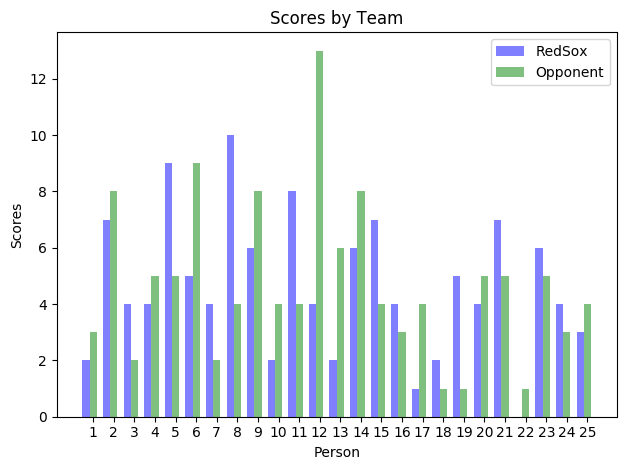

In [55]:
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 25
RedSox1 = RedSox_Scores
Opponent = opponent_score
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.5
 
rects1 = plt.bar(index, RedSox1, bar_width,
                 alpha=opacity,
                 color='b',
                 label='RedSox')
 
rects2 = plt.bar(index + bar_width, Opponent, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Opponent')
 
plt.xlabel('Person')
plt.ylabel('Scores')
plt.title('Scores by Team')
plt.xticks(index + bar_width, range(1,26))
plt.legend()
 
plt.tight_layout()
plt.show()

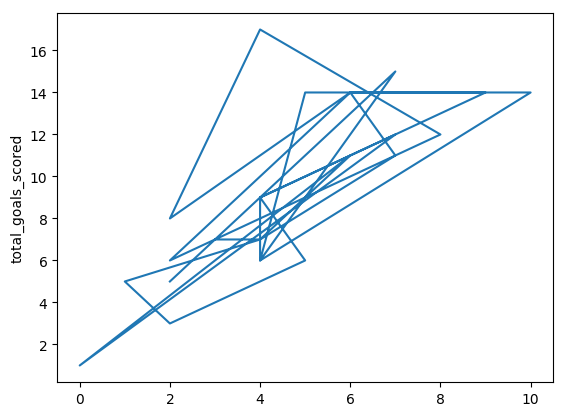

In [56]:
import matplotlib.pyplot as plt
plt.plot(RedSox_Scores,total_goals_scored)

plt.ylabel('total_goals_scored')
plt.show()

In [51]:
type(RedSox)

int

In [44]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#print (__version__) 

In [57]:
#create line chart
import plotly.plotly as py
import plotly.graph_objs as go

# Create a trace
trace = go.Scatter(
    x = RedSox_Scores,
    y = total_goals_scored,
    mode = 'markers',
    name = 'Red Sox'
)

data = [trace]

plot(data, filename='Red Sox Plot')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/plotly/offline/offline.py:440: UserWarning:

Your filename `Red Sox Plot` didn't end with .html. Adding .html to the end of your file.



'file:///usr/local/share/Red Sox Plot.html'

In [58]:
#create line chart
import plotly.plotly as py
import plotly.graph_objs as go

# Create a trace
trace = go.Scatter(
    x = RedSox_Scores,
    y = total_goals_scored,
    mode = 'markers',
    name = 'Red Sox'
)

trace1 = go.Scatter(
    x = opponent_score,
    y = total_goals_scored,
    mode = 'markers',
    name = 'Opponent'
)


data = [trace,trace1]

plot(data, filename='Red Sox vs opponents Plot')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/plotly/offline/offline.py:440: UserWarning:

Your filename `Red Sox vs opponents Plot` didn't end with .html. Adding .html to the end of your file.



'file:///usr/local/share/Red Sox vs opponents Plot.html'

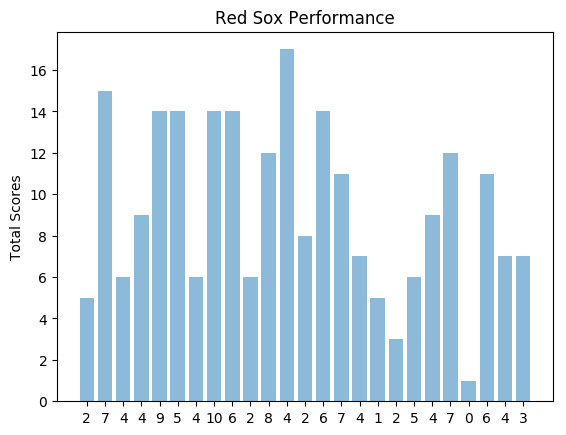

In [32]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = RedSox_Scores
y_pos = np.arange(len(objects))
performance = total_goals_scored
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Total Scores')
plt.title('Red Sox Performance')
 
plt.show()

In [38]:
type(RedSox)

int